In [1]:
from __future__ import print_function, division, absolute_import
import os,sys
import numpy as np
from scipy.linalg import inv, block_diag
import time
from joblib import Parallel, delayed
import gudhi
sys.path.insert(0, "C:\\Users\\matt\\Desktop\\orbithunter\\")
from orbithunter import *
import matplotlib.pyplot as plt
import itertools
from gudhi.hera import wasserstein_distance

In [11]:
orbit0 = read_h5('OrbitKS_L31p245_T46p754.h5')
orbit1 = read_h5('OrbitKS_L26p931_T41p266.h5')
orbit2 = read_h5('OrbitKS_L37p297_T79p778.h5')
orbit3 = read_h5('OrbitKS_L27p038_T23p329.h5')

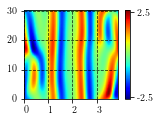

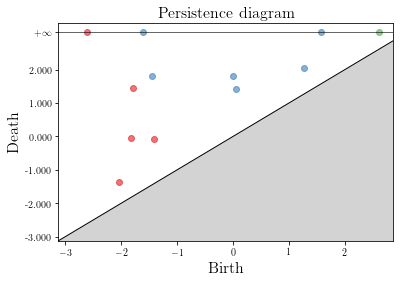

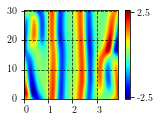

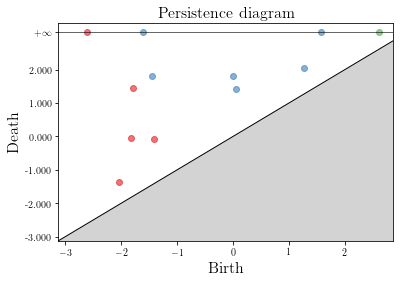

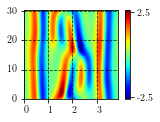

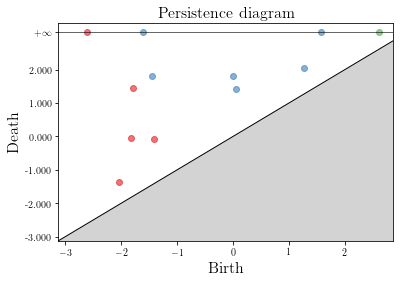

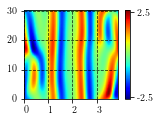

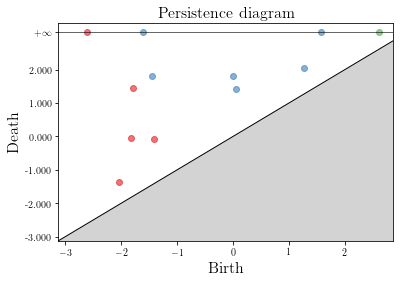

In [15]:
persistences = []
sr = read_h5('ShiftReflectionOrbitKS_L34p465_T30p451.h5')
group_orbit = [sr, sr.reflection(), sr.cell_shift(axis=1), sr.cell_shift().reflection()]
for orbit in group_orbit:
    orbit.plot(fundamental_domain=False)
    pcc = orbit_periodic_cubical_complex(orbit)
    ps = pcc.persistence(min_persistence=0.5)
    persistences.append([p[-1] for p in ps])
    gudhi_plot(ps)

In [16]:
for g in group_orbit:
    print(gudhi_distance(group_orbit[0], g, metric='wasserstein'))

0.0
4.371503159461554e-15
1.565327728547672e-14
1.572266622451579e-14


In [18]:
for o1, o2 in itertools.product([orbit1, orbit2, orbit3, orbit0],[orbit1, orbit2, orbit3, orbit0]):
    print(gudhi_distance(o1, o2, metric='wasserstein'))

0.0
366.5932754784096
17.355185764222767
18.37523190951547
366.5865786108654
0.0
367.8618198543497
377.7046668577417
17.353544805319054
367.86485017625836
0.0
18.859872880052478
18.375231909515467
377.7071991923219
18.85974582325769
0.0
